MATH 156 Assignment 2 Task 4, Maximilian Stumpf, Niklas Andie, Erik Putzier

In [1]:
#TASK 4A
import pandas as pd
wine_quality = pd.read_csv('winequality-red.csv', sep=';')

In [2]:
#TASK 4B
import sklearn.model_selection
train_val_df, test_df = sklearn.model_selection.train_test_split(wine_quality, test_size=0.1, random_state=1)
train_df, validation_df = sklearn.model_selection.train_test_split(train_val_df, test_size=0.2, random_state=1)


In [3]:
#TASK 4C
import numpy as np
def concat_ones(X):
    # Add a 1 in front of every training sample for the bias term.
    return np.concatenate([np.ones(shape=(len(X), 1)), X], axis=1)


class LR:
    def __init__(self, learn_bias=False):
        self.beta = None
        self.learn_bias = learn_bias

    def fit(self, X, y):
        if self.learn_bias:
            X = concat_ones(X)
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y
        return self.beta

    def predict(self, X_test):
        if self.learn_bias:
            X_test = concat_ones(X_test)
        if self.beta is None:
            raise ValueError('Fit the LR model before predicting.')
        return X_test @ self.beta
    
model = LR()
    
simple_linear_model = LR(learn_bias=True)
 
X_train = train_df.loc[:, train_df.columns != 'quality'].values 
y_train = train_df['quality'].values  

beta_estimate_train = simple_linear_model.fit(X_train,y_train)                                       
target_predictions_train = simple_linear_model.predict(X_train)

X_test = test_df.loc[:, train_df.columns != 'quality'].values 
y_test = test_df['quality'].values  
                                  
target_predictions_test = simple_linear_model.predict(X_test)

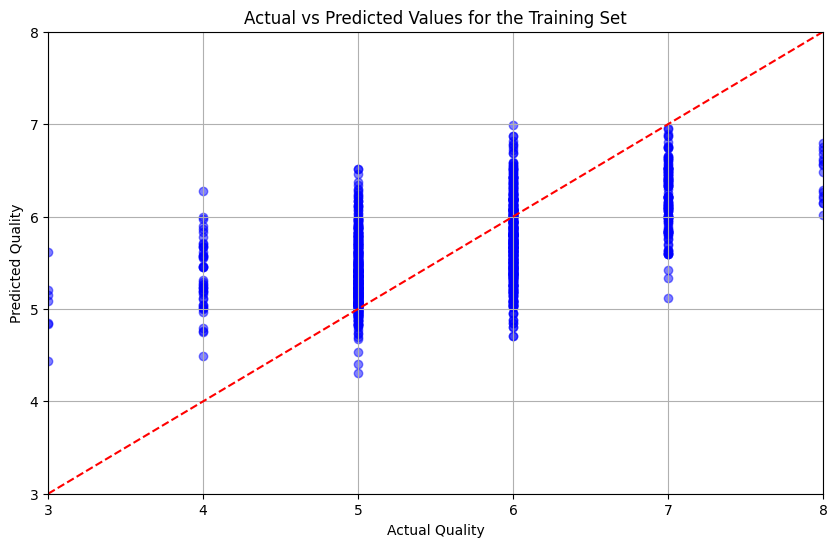

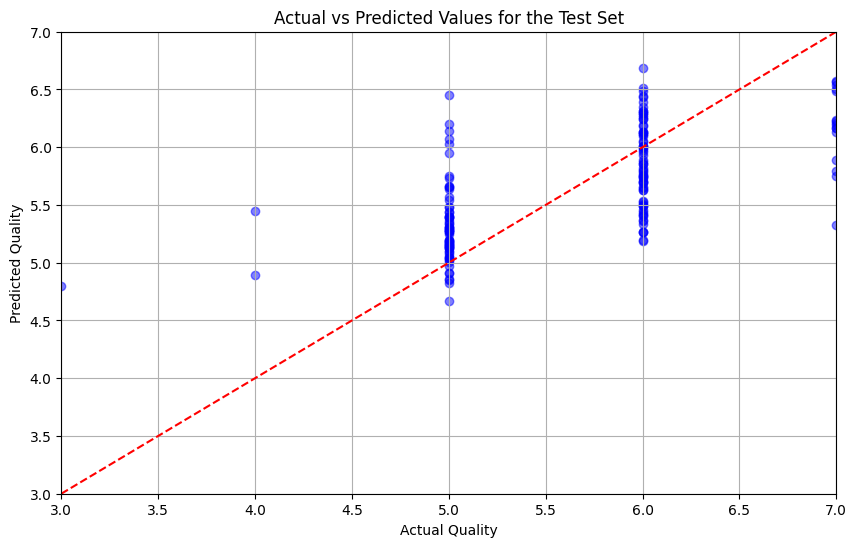

In [4]:
#TASK 4D
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.xlim(y_true.min(), y_true.max())
    plt.ylim(y_true.min(), y_true.max())
    plt.grid()
    plt.show()

plot_actual_vs_predicted(y_train,target_predictions_train, "Actual vs Predicted Values for the Training Set")
plot_actual_vs_predicted(y_test,target_predictions_test, "Actual vs Predicted Values for the Test Set")

From the plot we can conclude two things:
1. visually the error seems on the test set is higher than the error on the test set
2. bad wines are systematically overestimated while cheap wines are systematically underestimated

In [5]:
#TASK 4E
def RMSE(y_true, y_pred):
    residues = y_true - y_pred
    return np.sqrt(residues @ residues.T / len(y_true))

RMSE_test = RMSE(y_test,target_predictions_test)
RMSE_train = RMSE(y_train,target_predictions_train)
print(f"RMSE for the training set is {RMSE_train}")
print(f"RMSE for the test set is {RMSE_test}")

RMSE for the training set is 0.6631699428180866
RMSE for the test set is 0.5296531736675667


Iteration 0, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 100, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 200, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 300, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 400, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 500, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 600, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 700, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 800, RMSE: <function RMSE at 0x000001E03F6B1870>
Iteration 900, RMSE: <function RMSE at 0x000001E03F6B1870>


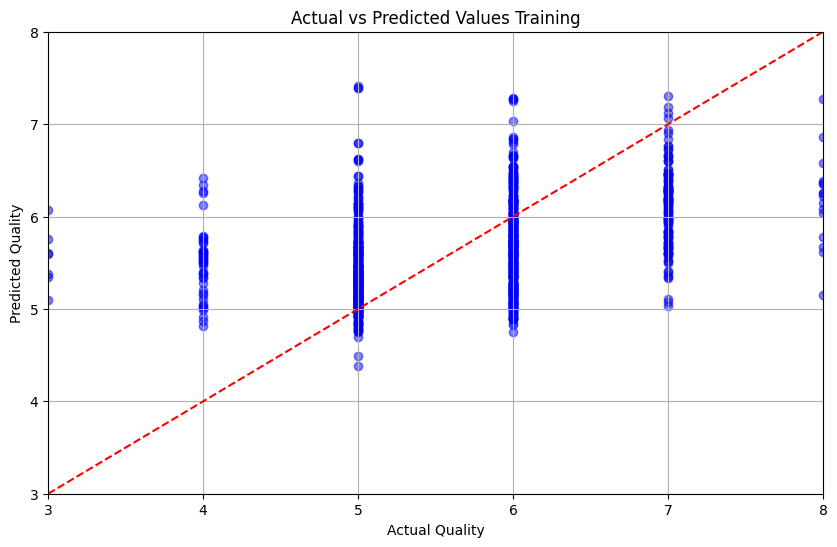

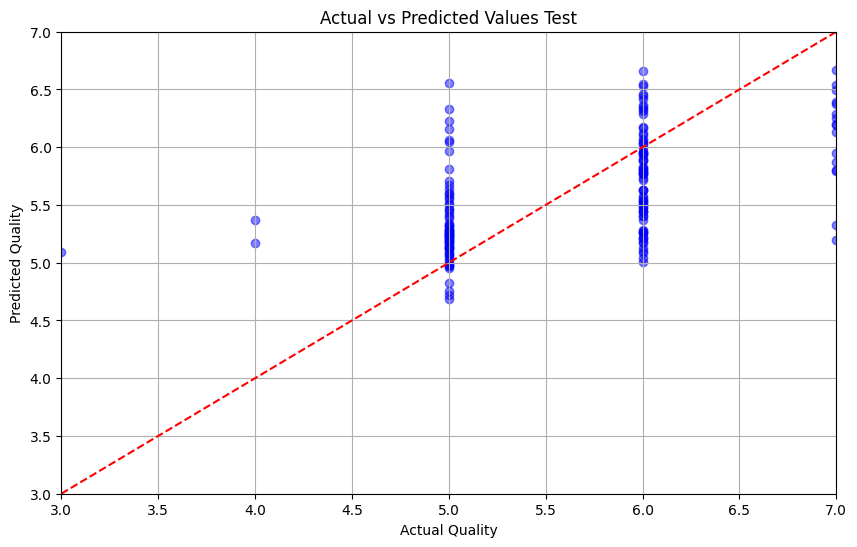

MSE for the training set is 0.7551237879894088
MSE for the test set is 0.6359199974052594


In [6]:
#TASK 4F
class SimpleLMS:
    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initializing weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            # Making predictions
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            # Calculating gradients by hand (found this way on the web)
            # https://medium.com/analytics-vidhya/implementing-gradient-descent-for-multi-linear-regression-from-scratch-3e31c114ae12 #

            # Updating weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Printing RMSE every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}, RMSE: {RMSE}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Using
lms_model = SimpleLMS(learning_rate=0.0001, n_iterations=1000)
# we experimented with the lerning rate & set it to 0.0001, if we went any larger (e.g. 0.001) the stepsize would have been to big and that led to unstable training and no proper results
lms_model.fit(X_train, y_train)

# Making predictions
train_predictions = lms_model.predict(X_train)
test_predictions = lms_model.predict(X_test)

# plotting results
plot_actual_vs_predicted(y_train, train_predictions, "Actual vs Predicted Values Training")
plot_actual_vs_predicted(y_test, test_predictions, "Actual vs Predicted Values Test")

In [8]:
#TASK 4G
# Calculating RMSE
rmse_train_2 = RMSE(y_train, train_predictions)
rmse_test_2 = RMSE(y_test, test_predictions)

print(f"MSE for the training set is {rmse_train_2}")
print(f"MSE for the test set is {rmse_test_2}")

MSE for the training set is 0.7551237879894088
MSE for the test set is 0.6359199974052594
